<a href="https://colab.research.google.com/github/Jgabriel1800/Clientes-mercado/blob/main/Clientes_mercado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [138]:
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5, AZUL6 = '#174A7E', '#4A81BF', "#6495ED", '#2596BE', '#94AFC5', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5, BRANCO = '#231F20', '#414040', '#555655', '#A6A6A5', '#BFBEBE', '#FFFFFF'
VERMELHO1, VERMELHO2, LARANJA1 = '#C3514E',	'#E6BAB7',	'#F79747'
VERDE1, VERDE2, VERDE3 = '#0C8040',	'#9ABB59', '#9ECCB3'

In [139]:
df=pd.read_csv('/content/drive/MyDrive/archive (2)/Customers.csv')
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


Analisar a quantidade de homens e mulheres na empresa

In [141]:
df_genero=df.copy()
df_genero=df['Gender'].value_counts()
df_genero

,count
Gender,
Female,1186
Male,814


Gráfico da quantidade de homens e mulheres

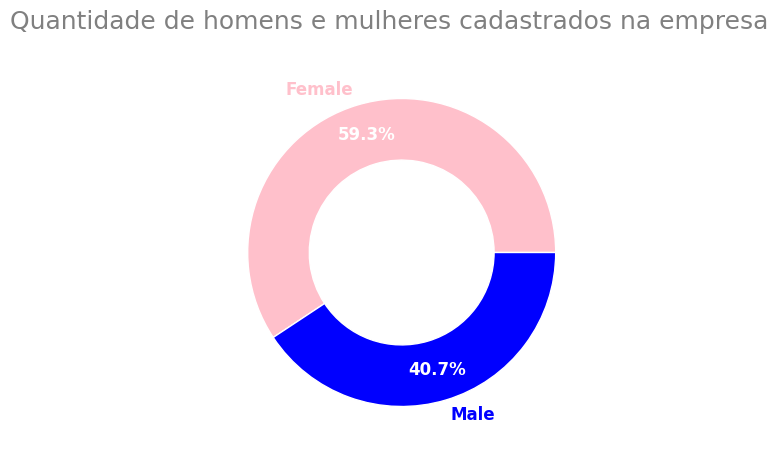

In [142]:
import matplotlib.pyplot as plt
df_genero = df['Gender'].value_counts()
fig, ax = plt.subplots(figsize=(10, 5))

plt.suptitle('Quantidade de homens e mulheres cadastrados na empresa',fontsize=18, color='grey', ha='center')

ptc, text, _ = ax.pie(df_genero, labels=df_genero.index,  autopct='%.1f%%',startangle=0,pctdistance=0.8,  wedgeprops=dict(width=0.4),
textprops=dict(size=12, fontweight='bold', color='white'),colors=['pink', 'blue'])

for t, p in zip(text, ptc):
    t.set_color(p.get_facecolor())

plt.show()


Analisando a distribuição das idades dos homens

In [143]:
df_homem_idade=df.copy()
df_homem_idade = df_homem_idade[df['Gender'] == 'Male'].copy()
df_homem_idade=df_homem_idade[['Gender','Age']]
df_homem_idade=df_homem_idade['Age'].value_counts()
df_homem_idade = df_homem_idade.reset_index()
df_homem_idade=df_homem_idade.rename(columns={'Age':'idade','count':'quantidade'})
df_homem_idade

,idade,quantidade
0,32,13
1,59,13
2,19,12
3,97,12
4,89,12
...,...,...
95,50,4
96,57,4
97,10,3
98,98,2


In [144]:
bins = range(0, 101, 10)  # De 0 a 100 anos, em intervalos de 10
labels = [f'{i}-{i+9}' for i in bins[:-1]]  # Ex: '0-9', '10-19', ...

df_homem_idade['faixa_etaria'] = pd.cut(df_homem_idade['idade'], bins=bins, labels=labels, right=False)


df_homem_idade_agrupado = df_homem_idade.groupby('faixa_etaria')['quantidade'].sum().reset_index()

df_homem_idade_agrupado

<ipython-input-144-da0b78cde768>:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,faixa_etaria,quantidade
0,0-9,77
1,10-19,81
2,20-29,93
3,30-39,92
4,40-49,74
5,50-59,73
6,60-69,84
7,70-79,76
8,80-89,86
9,90-99,78


In [145]:
fig = px.bar(
    df_homem_idade_agrupado,
    x='quantidade',
    y='faixa_etaria',
    orientation='h',
    title='Distribuição das idades dos homens',
    labels={},
    text='quantidade',
    color='quantidade',
    color_continuous_scale='Blues'
)

fig.update_traces(textposition='outside', hoverinfo='y+text')

fig.update_layout(
    title={
        'text': "📊 Distribuição das Idades das Mulheres",
        'x': 0.5,
        'xanchor': 'right',
        'yanchor': 'top'
    },
    font=dict(
        family="Arial, sans-serif",
        size=18,
        color=AZUL1
    ),
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig.update_layout(xaxis_title=None, yaxis_title=None)
fig.show()


Agora analisar a idade das mulheres

In [146]:
df_mulher_idade=df.copy()
df_mulher_idade=df_mulher_idade[df_mulher_idade['Gender']=='Female']
df_mulher_idade=df_mulher_idade[['Gender','Age']]
df_mulher_idade=df_mulher_idade['Age'].value_counts()
df_mulher_idade=df_mulher_idade.reset_index()
df_mulher_idade=df_mulher_idade.rename(columns={'Age':'idade','count':'quantidade'})
df_mulher_idade

,idade,quantidade
0,31,24
1,52,21
2,30,20
3,54,19
4,91,19
...,...,...
95,2,7
96,73,7
97,94,6
98,74,5


In [147]:
bins=range(0,101,10)
labels=[f'{i}-{i+9}' for i in bins[:-1]]

df_mulher_idade['faixa_etaria']=pd.cut(df_mulher_idade['idade'],bins=bins,labels=labels,right=False)

df_mulher_idade_agrupado=df_mulher_idade.groupby('faixa_etaria')['quantidade'].sum().reset_index()
df_mulher_idade

<ipython-input-147-37c3f88540d3>:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,idade,quantidade,faixa_etaria
0,31,24,30-39
1,52,21,50-59
2,30,20,30-39
3,54,19,50-59
4,91,19,90-99
...,...,...,...
95,2,7,0-9
96,73,7,70-79
97,94,6,90-99
98,74,5,70-79


Criando gráfico

In [148]:
fig = px.bar(
    df_mulher_idade_agrupado,
    x='quantidade',
    y='faixa_etaria',
    orientation='h',
    title='Distribuição das idades das mulheres',
    labels={},
    text='quantidade',
    color='quantidade',
    color_continuous_scale='Reds'

)
fig.update_layout(
    title={'text': "📊 Distribuição das Idades das Mulheres",  'x': 0.5,  'xanchor': 'right',  'yanchor': 'top'
    },font=dict(family="Arial, sans-serif", size=18,  color=VERMELHO1
    ),
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig.update_traces(textposition='outside', hoverinfo='y+text')

fig.update_layout(xaxis_title=None, yaxis_title=None)
fig.show()


Analisar as profissões dos homens

In [149]:
df_homem_profissao=df.copy()
df_homem_profissao=df_homem_profissao[df_homem_profissao['Gender']=='Male']
df_homem_profissao=df_homem_profissao[['Gender','Profession']]
df_homem_profissao=df_homem_profissao['Profession'].value_counts()
df_homem_profissao=df_homem_profissao.reset_index()
df_home_profissao=df_homem_profissao.rename(columns={'Profession':'profissão','count':'quantidade'})
df_homem_profissao

,Profession,count
0,Artist,232
1,Healthcare,143
2,Entertainment,101
3,Engineer,76
4,Doctor,72
5,Executive,66
6,Lawyer,56
7,Marketing,32
8,Homemaker,21


Criando gráfico

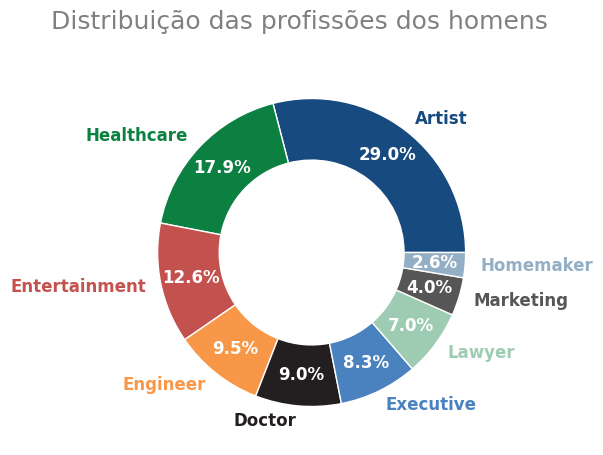

In [150]:
def grafico_profissao_homem():
  fig, ax = plt.subplots(figsize=(10, 5))
  plt.suptitle('Distribuição das profissões dos homens', fontsize=18, color='grey', ha='center')
  colors=[AZUL1, VERDE1, VERMELHO1, LARANJA1, CINZA1, AZUL2, VERDE3, CINZA3, AZUL5]
  ptc, text, _ = ax.pie(
      df_homem_profissao['count'],
      labels=df_homem_profissao['Profession'],
      autopct='%.1f%%',
      startangle=0,
      pctdistance=0.8,
      wedgeprops=dict(width=0.4),
      textprops=dict(size=12, fontweight='bold', color='white'),
      colors=[AZUL1, VERDE1, VERMELHO1, LARANJA1, CINZA1, AZUL2, VERDE3, CINZA3, AZUL5]
  )


  for t, p in zip(text, ptc):
      t.set_color(p.get_facecolor())
  return ax,colors

ax,colors=grafico_profissao_homem()


Criando função para escrever estilizado

In [151]:
from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas
    canvas.draw()
    renderer = canvas.get_renderer()

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(renderer)
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width, units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

**criando mensagem**

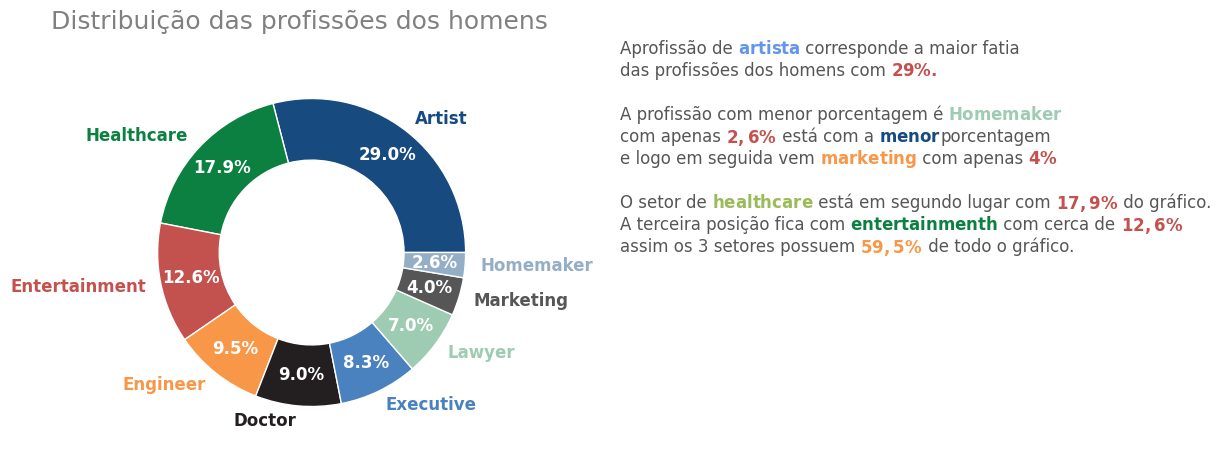

In [152]:
ax,colors=grafico_profissao_homem()

texto_colorido(2,0,'Aprofissão de ||$\\bf{artista}$|| corresponde a maior fatia\n'
     'das profissões dos homens com ||$\\bf{29\%.}$||, do gráfico total!\n'
    '\n'
     'A profissão com menor porcentagem é ||$\\bf{Homemaker}$\n'
     'com apenas ||$\\bf{2,6\%}$|| está com a ||$\\bf{menor }$||porcentagem\n'
     'e logo em seguida vem ||$\\bf{marketing}$|| com apenas ||$\\bf{4\%}$||.\n'
     '\n'
     'O setor de ||$\\bf{healthcare}$|| está em segundo lugar com ||$\\bf{17,9\%}$|| do gráfico.\n'
     'A terceira posição fica com ||$\\bf{entertainmenth}$|| com cerca de ||$\\bf{12,6\%}$||\n'
     'assim os 3 setores possuem ||$\\bf{ 59,5\%}$|| de todo o gráfico.',
 [    [CINZA3, AZUL3, CINZA3],
      [ CINZA3,VERMELHO1],
      [CINZA3,VERMELHO1],
      [CINZA3, VERDE3],
      [CINZA3, VERMELHO1, CINZA3,AZUL1,CINZA3],
      [CINZA3, LARANJA1, CINZA3,VERMELHO1],
      [CINZA3],
      [CINZA3, VERDE2, CINZA3,VERMELHO1,CINZA3],
      [CINZA3, VERDE1, CINZA3,VERMELHO1],
      [CINZA3, LARANJA1, CINZA3]
     ],esp=22,ax=ax,fontsize=12)


gerando o dataframe para as mulheres

In [153]:
df_mulher_profissao = df.copy()
df_mulher_profissao = df_mulher_profissao[df_mulher_profissao['Gender'] == 'Female']
df_mulher_profissao = df_mulher_profissao['Profession'].value_counts().reset_index()
df_mulher_profissao.columns = ['Profession', 'count']
df_mulher_profissao


,Profession,count
0,Artist,380
1,Healthcare,196
2,Entertainment,133
3,Engineer,103
4,Doctor,89
5,Executive,87
6,Lawyer,86
7,Marketing,53
8,Homemaker,39


Gerando o gráfico

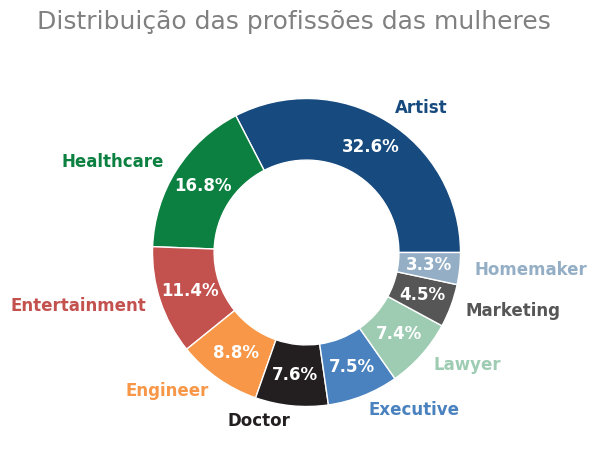

In [154]:
def grafico_profissao_mulher():
  fig, ax = plt.subplots(figsize=(10, 5))
  plt.suptitle('Distribuição das profissões das mulheres', fontsize=18, color='grey', ha='center')
  colors=[AZUL1, VERDE1, VERMELHO1, LARANJA1, CINZA1, AZUL2, VERDE3, CINZA3, AZUL5]
  ptc, text, _ = ax.pie(
      df_mulher_profissao['count'],
      labels=df_mulher_profissao['Profession'],
      autopct='%.1f%%',
      startangle=0,
      pctdistance=0.8,
      wedgeprops=dict(width=0.4),
      textprops=dict(size=12, fontweight='bold', color='white'),
      colors=[AZUL1, VERDE1, VERMELHO1, LARANJA1, CINZA1, AZUL2, VERDE3, CINZA3, AZUL5]
  )


  for t, p in zip(text, ptc):
      t.set_color(p.get_facecolor())
  return ax,colors

ax,colors=grafico_profissao_mulher()

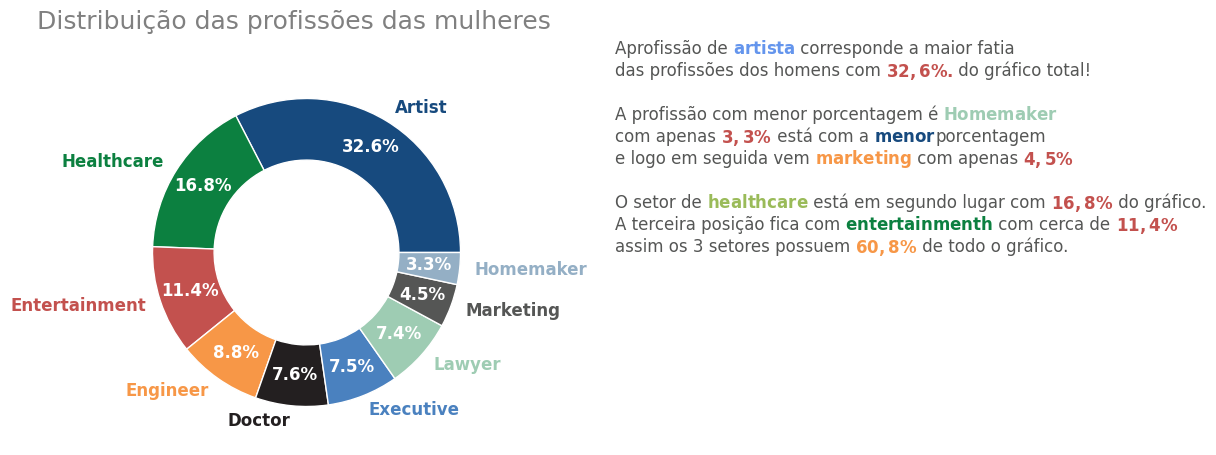

In [155]:
ax,colors=grafico_profissao_mulher()

texto_colorido(2,0,'Aprofissão de ||$\\bf{artista}$|| corresponde a maior fatia\n'
     'das profissões dos homens com ||$\\bf{32,6\%.}$|| do gráfico total!\n'
    '\n'
     'A profissão com menor porcentagem é ||$\\bf{Homemaker}$\n'
     'com apenas ||$\\bf{3,3\%}$|| está com a ||$\\bf{menor }$||porcentagem\n'
     'e logo em seguida vem ||$\\bf{marketing}$|| com apenas ||$\\bf{4,5\%}$||.\n'
     '\n'
     'O setor de ||$\\bf{healthcare}$|| está em segundo lugar com ||$\\bf{16,8\%}$|| do gráfico.\n'
     'A terceira posição fica com ||$\\bf{entertainmenth}$|| com cerca de ||$\\bf{11,4\%}$||\n'
     'assim os 3 setores possuem ||$\\bf{ 60,8\%}$|| de todo o gráfico.',
 [    [CINZA3, AZUL3, CINZA3],
      [ CINZA3,VERMELHO1,CINZA3],
      [CINZA3,VERMELHO1],
      [CINZA3, VERDE3],
      [CINZA3, VERMELHO1, CINZA3,AZUL1,CINZA3],
      [CINZA3, LARANJA1, CINZA3,VERMELHO1],
      [CINZA3],
      [CINZA3, VERDE2, CINZA3,VERMELHO1,CINZA3],
      [CINZA3, VERDE1, CINZA3,VERMELHO1],
      [CINZA3, LARANJA1, CINZA3]
     ],esp=22,ax=ax,fontsize=12)

Calculando media salarial homem

In [156]:
df_homem_renda = df.copy()
df_homem_renda = df_homem_renda[df_homem_renda['Gender'] == 'Male']
df_homem_renda = df_homem_renda[['Profession', 'Annual Income ($)']]
df_homem_renda = df_homem_renda.groupby('Profession', as_index=False).mean().sort_values(by='Annual Income ($)', ascending=False)
df_homem_renda

,Profession,Annual Income ($)
2,Engineer,114771.039474
1,Doctor,114181.472222
7,Lawyer,114055.000000
3,Entertainment,112945.356436
5,Healthcare,110325.566434
0,Artist,109880.961207
4,Executive,107138.818182
6,Homemaker,106268.333333
8,Marketing,102607.250000


Criando o gráfico da renda dos homens de acordo com o emprego

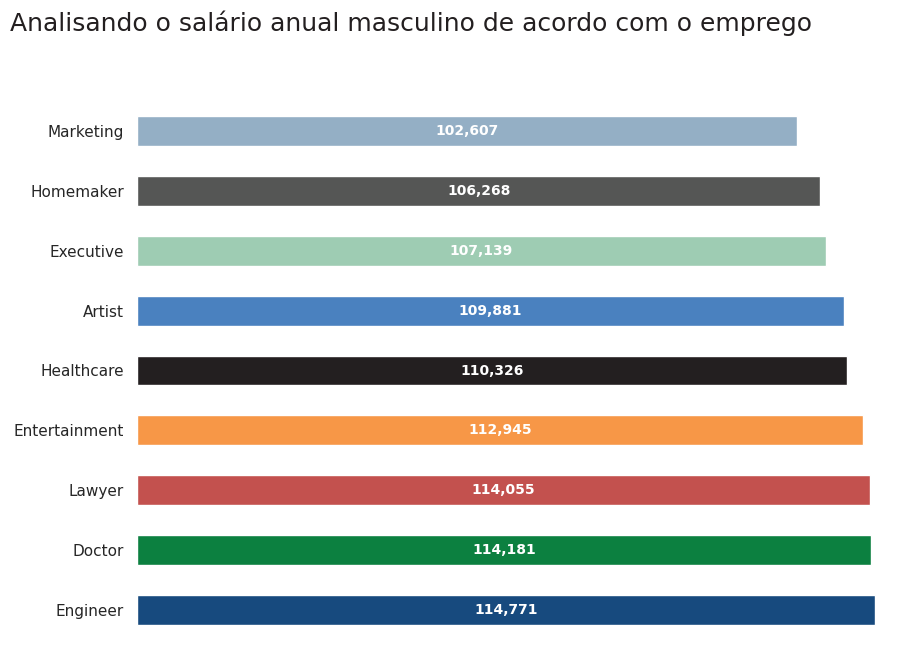

In [157]:
import matplotlib.pyplot as plt
def grafico_homem_renda():
  fig, ax = plt.subplots(figsize=(10, 7))

  colors = [AZUL1, VERDE1, VERMELHO1, LARANJA1, CINZA1, AZUL2, VERDE3, CINZA3, AZUL5]

  plt.suptitle('Analisando o salário anual masculino de acordo com o emprego',
              fontsize=18, color=CINZA1, ha='right', x=0.8, y=1.01)

  df_homem_renda.plot(kind='barh', x='Profession', y='Annual Income ($)', ax=ax, color=colors, legend=False)

  ax.set_xlabel('')
  ax.set_ylabel("")
  ax.xaxis.set_tick_params()
  ax.set_xticklabels([])
  ax.set_xticks([])
  ax.set_frame_on(False)

  for container in ax.containers:
      labels = [f"{valor.get_width():,.0f}" for valor in container]  # Formatar valores como inteiros
      ax.bar_label(container, label_type='center', labels=labels, size=10, color=BRANCO, fontweight='bold')

  for t, p in zip(text, ptc):
      t.set_color(p.get_facecolor())
  return ax,colors

ax,colors=grafico_homem_renda()



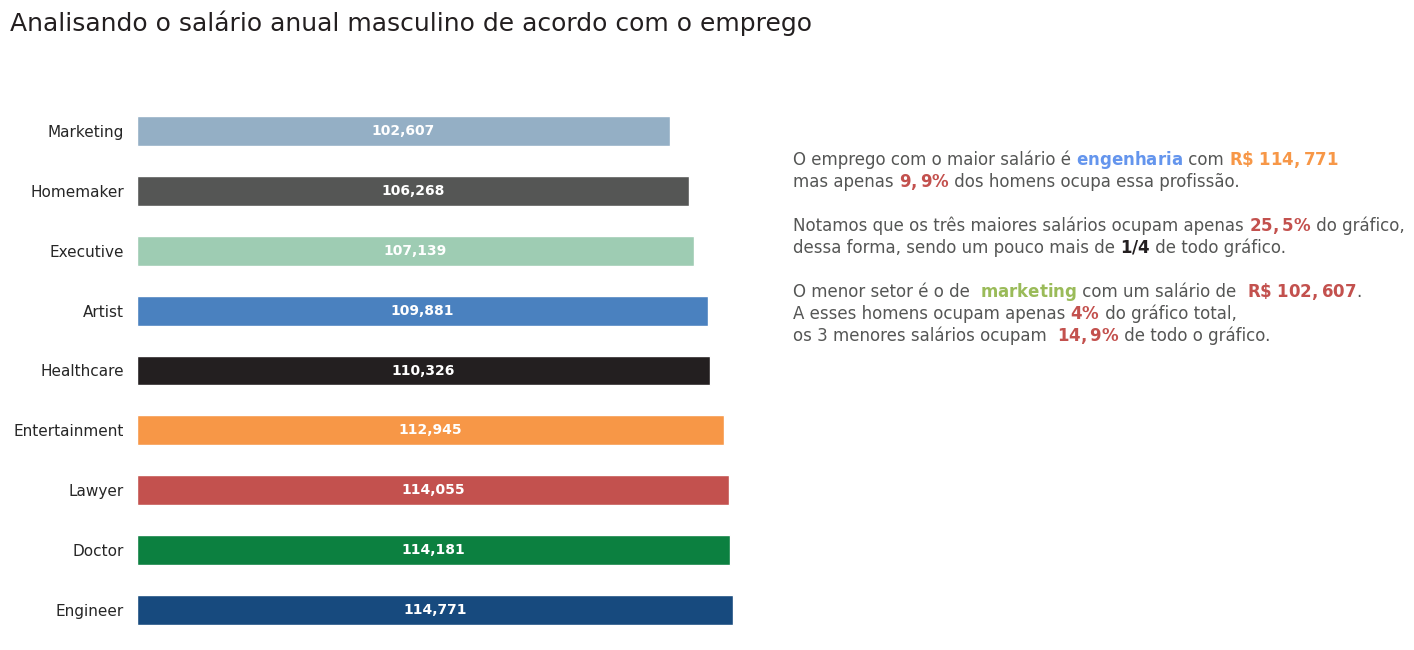

In [158]:

ax, colors = grafico_homem_renda()

ax.set_xlim(0, df_homem_renda['Annual Income ($)'].max() * 1.3)


texto_colorido(
    x=df_homem_renda['Annual Income ($)'].max() * 1.1,
    y=len(df_homem_renda) / 2,
    texto=('O emprego com o maior salário é ||$\\bf{engenharia}$|| com ||$\\bf{R\$\ 114,771}$|| \n'
           'mas apenas ||$\\bf{9,9\%}$|| dos homens ocupa essa profissão.\n'
           '\n'
           'Notamos que os três maiores salários ocupam apenas ||$\\bf{25,5\%}$|| do gráfico,\n'
           'dessa forma, sendo um pouco mais de ||$\\bf{1/4}$|| de todo gráfico.\n'
           '\n'
           'O menor setor é o de  ||$\\bf{marketing}$|| com um salário de  ||$\\bf{R\$\ 102,607}$||.\n'
           'A esses homens ocupam apenas ||$\\bf{4\%}$|| do gráfico total,\n'
           'os 3 menores salários ocupam  ||$\\bf{ 14,9\%}$|| de todo o gráfico.'),
    cores=[
        [CINZA3, AZUL3, CINZA3, LARANJA1],
        [CINZA3, VERMELHO1, CINZA3],
        [CINZA3],
        [CINZA3, VERMELHO1,CINZA3],
        [CINZA3, CINZA1, CINZA3],
        [CINZA3],
        [CINZA3, VERDE2, CINZA3, VERMELHO1, CINZA3],
        [CINZA3, VERMELHO1,CINZA3],
        [CINZA3, VERMELHO1, CINZA3]
    ],
    esp=22, ax=ax, fontsize=12
)

plt.show()


Criando o df da renda das profssiões das mulheres

In [159]:
df_mulher_renda=df.copy()
df_mulher_renda=df_mulher_renda[df_mulher_renda['Gender']=='Female']
df_mulher_renda=df_mulher_renda[['Profession','Annual Income ($)']]
df_mulher_renda=df_mulher_renda.groupby('Profession',as_index=False).mean().sort_values(by='Annual Income ($)',ascending=False)
df_mulher_renda

,Profession,Annual Income ($)
4,Executive,118800.781609
5,Healthcare,114214.510204
8,Marketing,111246.716981
6,Homemaker,110099.538462
1,Doctor,109463.168539
7,Lawyer,109003.825581
3,Entertainment,108907.496241
2,Engineer,108497.699029
0,Artist,108102.326316


criando o gráfico

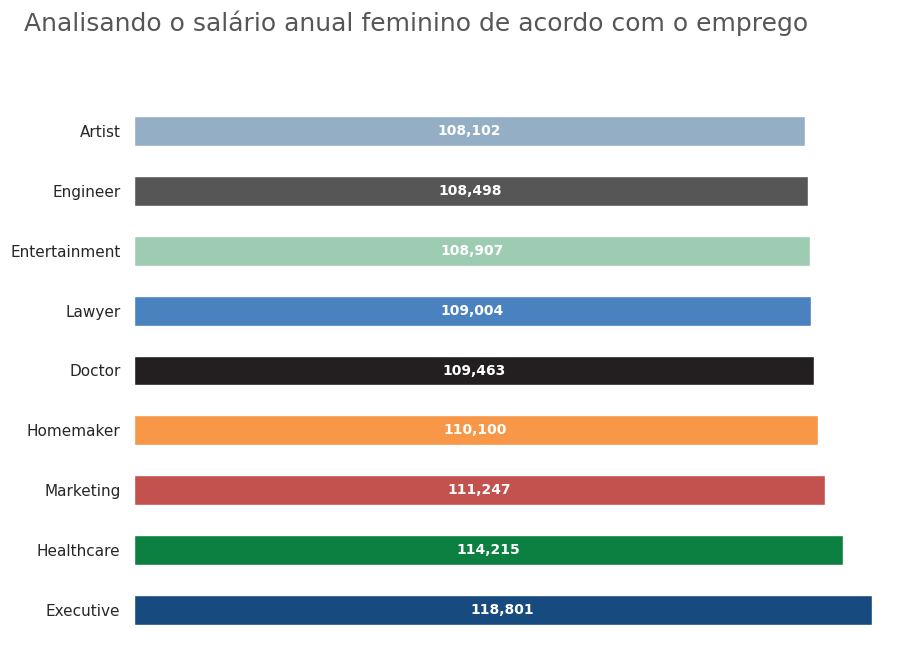

In [160]:
import matplotlib.pyplot as plt
def grafico_mulher_renda():
  fig, ax = plt.subplots(figsize=(10, 7))

  colors = [AZUL1, VERDE1, VERMELHO1, LARANJA1, CINZA1, AZUL2, VERDE3, CINZA3, AZUL5]

  plt.suptitle('Analisando o salário anual feminino de acordo com o emprego',
              fontsize=18, color=CINZA3, ha='right', x=0.8, y=1.01)


  df_mulher_renda.plot(kind='barh', x='Profession', y='Annual Income ($)', ax=ax, color=colors, legend=False)

  ax.set_xlabel('')
  ax.set_ylabel("")
  ax.xaxis.set_tick_params()
  ax.set_xticklabels([])
  ax.set_xticks([])
  ax.set_frame_on(False)

  for container in ax.containers:
      labels = [f"{valor.get_width():,.0f}" for valor in container]  # Formatar valores como inteiros
      ax.bar_label(container, label_type='center', labels=labels, size=10, color=BRANCO, fontweight='bold')

  for t, p in zip(text, ptc):
      t.set_color(p.get_facecolor())
  return ax,colors

ax,colors=grafico_mulher_renda()

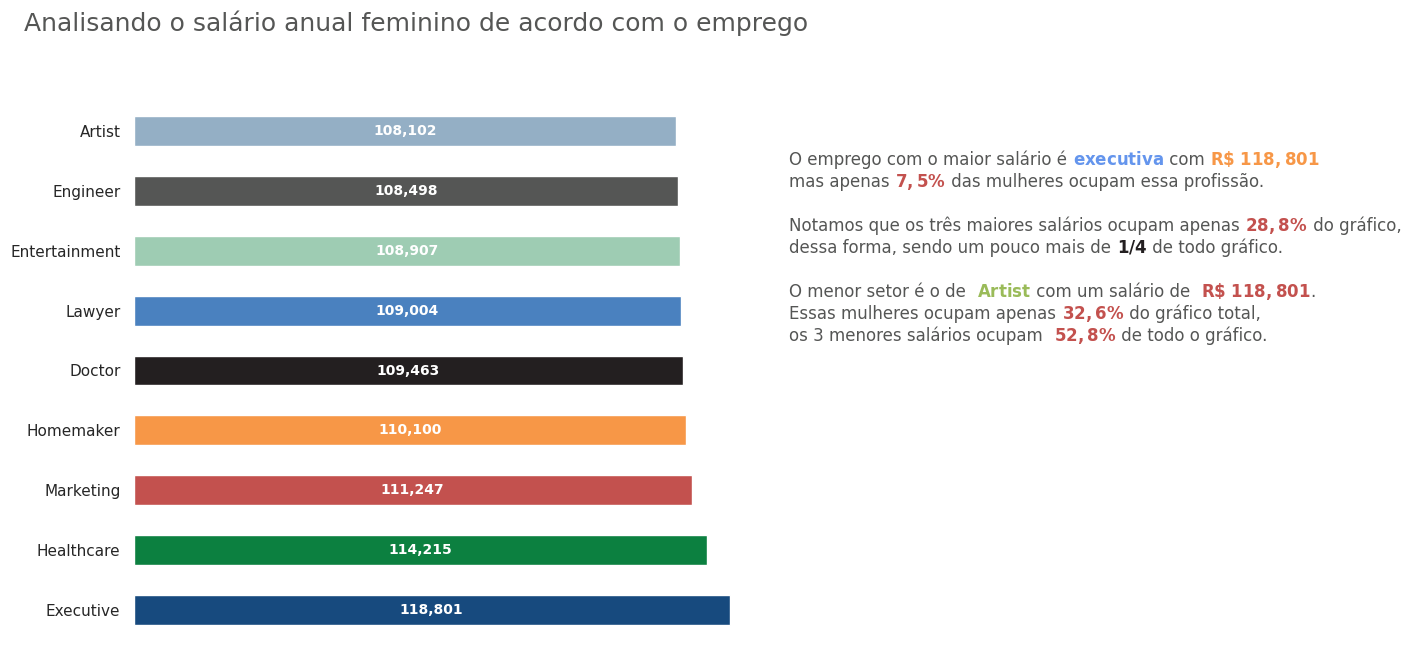

In [161]:

ax, colors = grafico_mulher_renda()

ax.set_xlim(0, df_mulher_renda['Annual Income ($)'].max() * 1.3)


texto_colorido(
    x=df_mulher_renda['Annual Income ($)'].max() * 1.1,
    y=len(df_mulher_renda) / 2,
    texto=('O emprego com o maior salário é ||$\\bf{executiva}$|| com ||$\\bf{R\$\ 118,801}$|| \n'
           'mas apenas ||$\\bf{7,5\%}$|| das mulheres ocupam essa profissão.\n'
           '\n'
           'Notamos que os três maiores salários ocupam apenas ||$\\bf{28,8\%}$|| do gráfico,\n'
           'dessa forma, sendo um pouco mais de ||$\\bf{1/4}$|| de todo gráfico.\n'
           '\n'
           'O menor setor é o de  ||$\\bf{Artist}$|| com um salário de  ||$\\bf{R\$\ 118,801}$||.\n'
           'Essas mulheres ocupam apenas ||$\\bf{32,6\%}$|| do gráfico total,\n'
           'os 3 menores salários ocupam  ||$\\bf{ 52,8\%}$|| de todo o gráfico.'),
    cores=[
        [CINZA3, AZUL3, CINZA3, LARANJA1],
        [CINZA3, VERMELHO1, CINZA3],
        [CINZA3],
        [CINZA3, VERMELHO1,CINZA3],
        [CINZA3, CINZA1, CINZA3],
        [CINZA3],
        [CINZA3, VERDE2, CINZA3, VERMELHO1, CINZA3],
        [CINZA3, VERMELHO1,CINZA3],
        [CINZA3, VERMELHO1, CINZA3]
    ],
    esp=22, ax=ax, fontsize=12
)


plt.show()

Vamos analisar se o tamanho da familia está compativel com o salario anual e profissão

In [162]:
import pandas as pd

df_familia_salario = df.copy()
df_familia_salario = df_familia_salario[['Annual Income ($)', 'Family Size']]

df_familia_salario = df_familia_salario.groupby('Family Size', as_index=False).mean()
df_familia_salario


,Family Size,Annual Income ($)
0,1,108752.377926
1,2,104697.354571
2,3,106412.514469
3,4,109476.148789
4,5,114283.461240
5,6,119060.242798
6,7,118191.602564
7,8,78607.750000
8,9,30000.000000


Gerando o gráfico

<ipython-input-166-d9961a19b4e9>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-166-d9961a19b4e9>:30: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



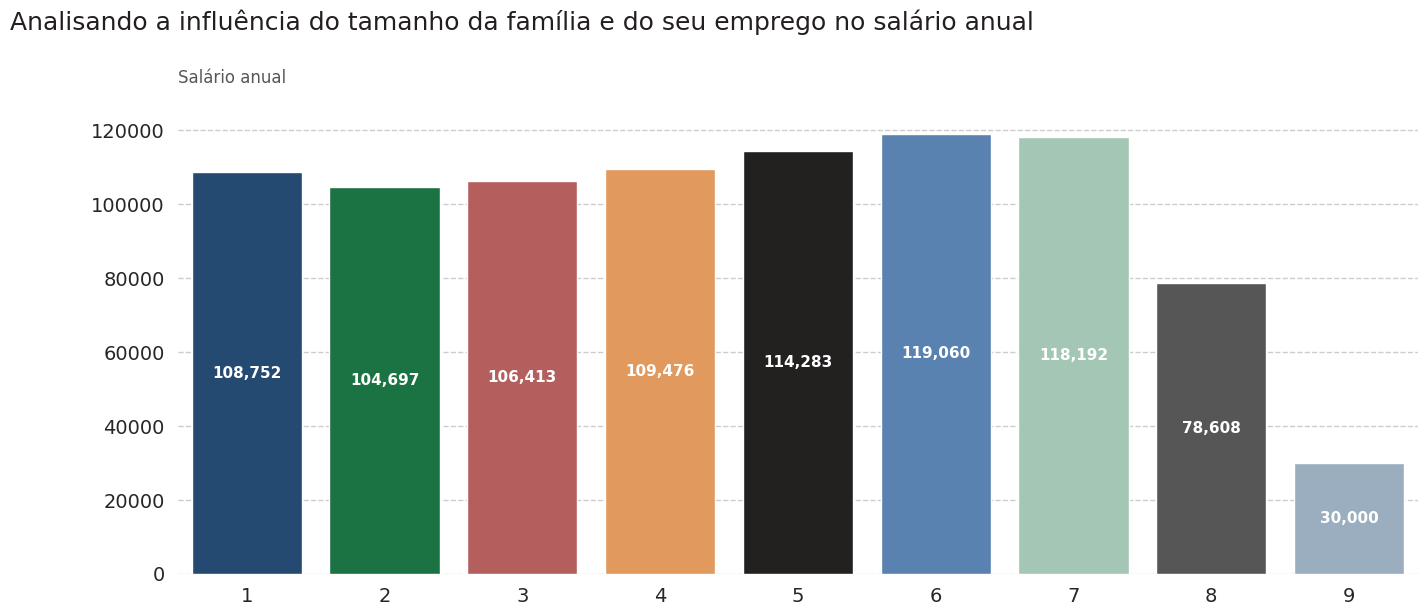

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(16,6))
sns.set_theme(style='white')

# Definição das cores
colors = [AZUL1, VERDE1, VERMELHO1, LARANJA1, CINZA1, AZUL2, VERDE3, CINZA3, AZUL5]

# Título do gráfico
fig.suptitle('Analisando a influência do tamanho da família e do seu emprego no salário anual',
             fontsize=18, color=CINZA1, ha='right', x=0.66, y=1.05)


sns.barplot(
    data=df_familia_salario,
    x='Family Size',
    y='Annual Income ($)',
    ax=ax,
    palette=colors
)


ax.set_title('Salário anual\n', color=CINZA3, loc='left')
ax.set_xlabel('')
ax.set_ylabel('')
ax.xaxis.set_tick_params(labelsize=14, color=CINZA2)
ax.yaxis.set_tick_params(labelsize=14, color=CINZA2)
ax.set_frame_on(False)
ax.legend().remove()
ax.yaxis.grid(linestyle='--', linewidth=1)

for container in ax.containers:
  labels=[f"{valor.get_height():,.0f}" for valor in container]
  ax.bar_label(container,label_type='center',labels=labels,size=11,color=BRANCO,fontweight='bold')

plt.show()

In [164]:
df_familia_salario['salario mensal membro']=(df_familia_salario['Annual Income ($)']/12)/df_familia_salario['Family Size']

df_familia_salario

,Family Size,Annual Income ($),salario mensal membro
0,1,108752.377926,9062.698161
1,2,104697.354571,4362.389774
2,3,106412.514469,2955.903180
3,4,109476.148789,2280.753100
4,5,114283.461240,1904.724354
5,6,119060.242798,1653.614483
6,7,118191.602564,1407.042888
7,8,78607.750000,818.830729
8,9,30000.000000,277.777778


criando o gráfico do salario anual por familia

<ipython-input-204-da91d1f898d6>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-204-da91d1f898d6>:16: UserWarning:

The palette list has more values (10) than needed (9), which may not be intended.

<ipython-input-204-da91d1f898d6>:32: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



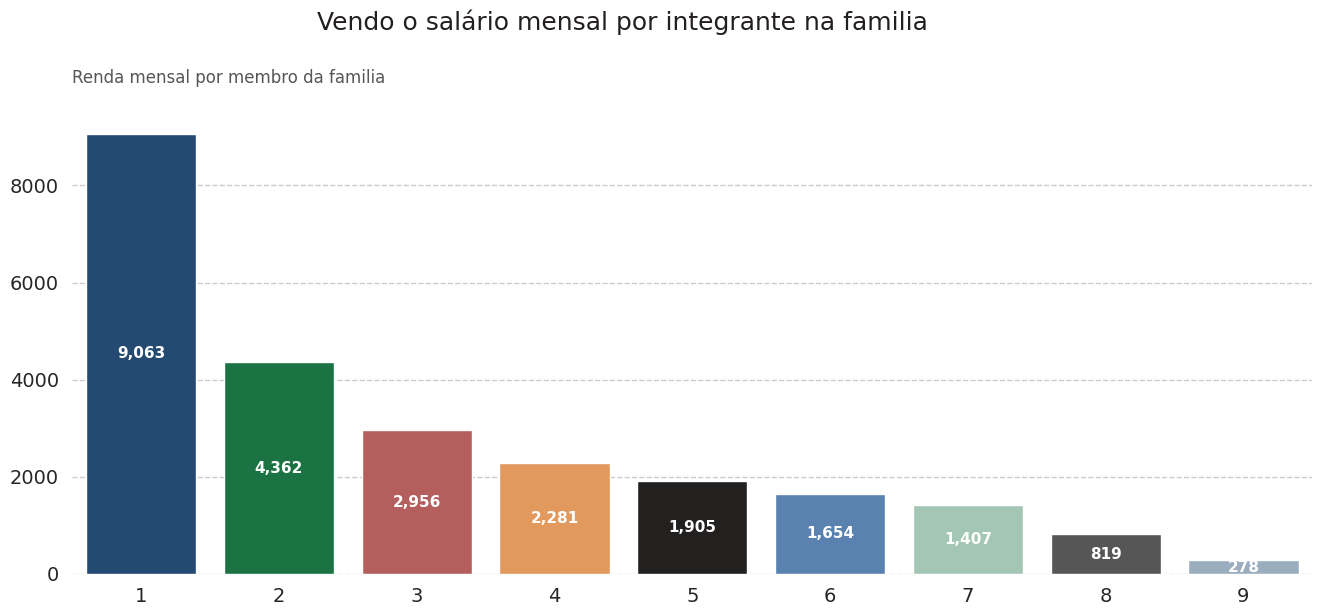

In [204]:
def grafico_familia_salario():
  import matplotlib.pyplot as plt
  import seaborn as sns

  fig, ax = plt.subplots(figsize=(16,6))
  sns.set_theme(style='white')

  # Definição das cores
  colors = [AZUL1, VERDE1, VERMELHO1, LARANJA1, CINZA1, AZUL2, VERDE3, CINZA3, AZUL5, VERMELHO2]

  # Título do gráfico
  fig.suptitle('Vendo o salário mensal por integrante na familia',
              fontsize=18, color=CINZA1, ha='right', x=0.66, y=1.05)


  sns.barplot(
      data=df_familia_salario,
      x='Family Size',
      y='salario mensal membro',
      ax=ax,
      palette=colors,

  )


  ax.set_title('Renda mensal por membro da familia\n', color=CINZA3, loc='left')
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.xaxis.set_tick_params(labelsize=14, color=CINZA2)
  ax.yaxis.set_tick_params(labelsize=14, color=CINZA2)
  ax.set_frame_on(False)
  ax.legend().remove()
  ax.yaxis.grid(linestyle='--', linewidth=1)

  for container in ax.containers:
    labels=[f"{valor.get_height():,.0f}" for valor in container]
    ax.bar_label(container,label_type='center',labels=labels,size=11,color=BRANCO,fontweight='bold')

  plt.show()
  for t, p in zip(text, ptc):
        t.set_color(p.get_facecolor())
  return ax,colors
ax,colors=grafico_familia_salario()

Vamos analisar os anos de experiencia com o salario anual

In [210]:
df_experiencia_salario=df.copy()
df_experiencia_salario=df_experiencia_salario[['Annual Income ($)','Work Experience']]
df_experiencia_salario=df_experiencia_salario.groupby('Work Experience',as_index=False).mean()

df_experiencia_salario

,Work Experience,Annual Income ($)
0,0,106117.547564
1,1,107656.927660
2,2,105747.650794
3,3,114020.618182
4,4,113905.644628
5,5,106230.470085
6,6,117741.191667
7,7,111330.817460
8,8,115476.180723
9,9,114422.675000


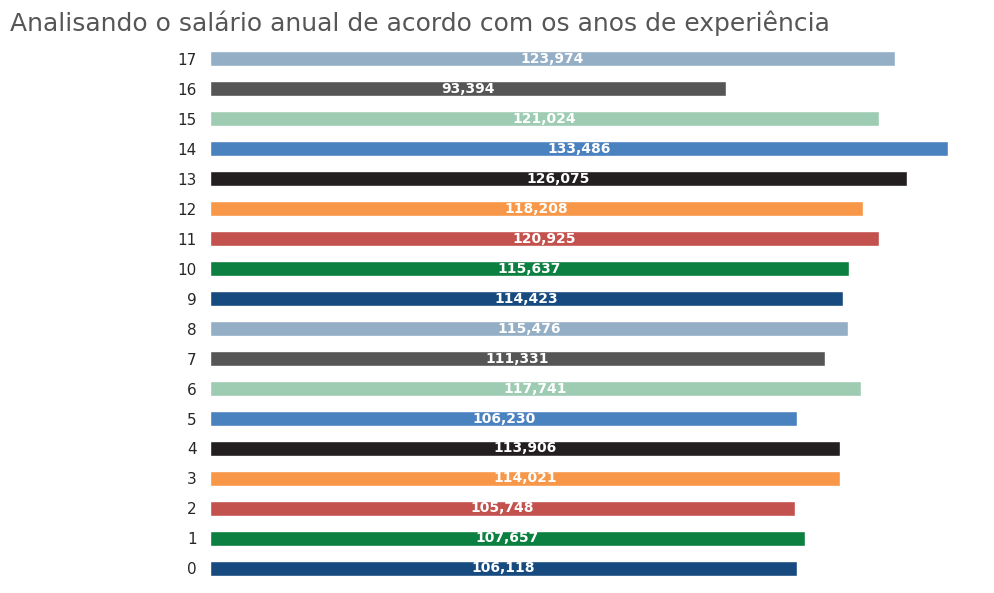

In [213]:
import matplotlib.pyplot as plt

def grafico_experiencia_salario():
    fig, ax = plt.subplots(figsize=(10, 7))
    colors = [AZUL1, VERDE1, VERMELHO1, LARANJA1, CINZA1, AZUL2, VERDE3, CINZA3, AZUL5]

    ax.set_title('Analisando o salário anual de acordo com os anos de experiência',
                 fontsize=18, color=CINZA3, ha='right', x=0.8, y=1.01)

    df_experiencia_salario.plot(kind='barh', x='Work Experience', y='Annual Income ($)', ax=ax, color=colors, legend=False)

    ax.set_xlabel('')
    ax.set_ylabel("")
    ax.xaxis.set_tick_params()
    ax.set_xticklabels([])
    ax.set_xticks([])
    ax.set_frame_on(False)

    for container in ax.containers:
        labels = [f"{valor.get_width():,.0f}" for valor in container]
        ax.bar_label(container, label_type='center', labels=labels, size=10, color=BRANCO, fontweight='bold')

    plt.show()
    return ax, colors

ax, colors = grafico_experiencia_salario()
